# ”yfinance“を用いた株情報の扱い方

https://toukei-lab.com/python_stock

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import yfinance as yf

#ターゲットを指定
ticker = "AMZN"

# #データを収集
# data = yf.download(ticker , period='7d', interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [46]:
#ターゲットを指定
tickers = "AMZN AAPL"

In [59]:
#データを収集
data = yf.download(ticker , period= "6mo", interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [60]:
data.head()


Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2024-07-18,183.750000,189.679993,181.449997,189.589996,51043600
2024-07-19,183.130005,184.929993,180.110001,181.139999,43081800
2024-07-22,182.550003,185.059998,182.479996,185.000000,39931900
2024-07-23,186.410004,189.389999,183.559998,184.100006,47537700
2024-07-24,180.830002,185.449997,180.410004,183.199997,41532400


In [61]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2025-01-13,218.460007,219.399994,216.470001,218.059998,27262700
2025-01-14,217.759995,221.820007,216.199997,220.440002,24711700
2025-01-15,223.350006,223.570007,220.750000,222.830002,31291300
2025-01-16,220.660004,224.649994,220.309998,224.419998,24757300
2025-01-17,225.940002,226.509995,223.080002,225.839996,42108900


Price や Ticker という名前のカラムが存在し、AMZN といったティッカーシンボルに関連付けられたデータが並んでいる状態のようです。データフレームの構造が意図したものと異なる可能性があるので、以下の手順で確認と修正を行います。

In [62]:
# カラム名を変更する例
data.columns = ["Close","High", "Low",  "Open", "Volume"]
print(data.head())

                 Close        High         Low        Open    Volume
Date                                                                
2024-07-18  183.750000  189.679993  181.449997  189.589996  51043600
2024-07-19  183.130005  184.929993  180.110001  181.139999  43081800
2024-07-22  182.550003  185.059998  182.479996  185.000000  39931900
2024-07-23  186.410004  189.389999  183.559998  184.100006  47537700
2024-07-24  180.830002  185.449997  180.410004  183.199997  41532400


またこの期間に「start/end」を使って、特定の日にちを指定することも出来ます

In [63]:
#データを収集
# data = yf.download(ticker, start= "2022-01-01",end="2022-01-15", interval = "1d")

取得できる頻度のバリエーションは決まっています

[1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo]

m⇒分、h⇒時間、d⇒日、wk⇒週、mo⇒月となっています



In [64]:
data

,Close,High,Low,Open,Volume
Date,,,,,
2024-07-18,183.750000,189.679993,181.449997,189.589996,51043600
2024-07-19,183.130005,184.929993,180.110001,181.139999,43081800
2024-07-22,182.550003,185.059998,182.479996,185.000000,39931900
2024-07-23,186.410004,189.389999,183.559998,184.100006,47537700
2024-07-24,180.830002,185.449997,180.410004,183.199997,41532400
...,...,...,...,...,...
2025-01-13,218.460007,219.399994,216.470001,218.059998,27262700
2025-01-14,217.759995,221.820007,216.199997,220.440002,24711700
2025-01-15,223.350006,223.570007,220.750000,222.830002,31291300


Date：取得日時

Open：始値

High：高値

Low：安値

Close：終値

Adj Close：調整後終値

Volume：出来高

<Axes: xlabel='Date'>

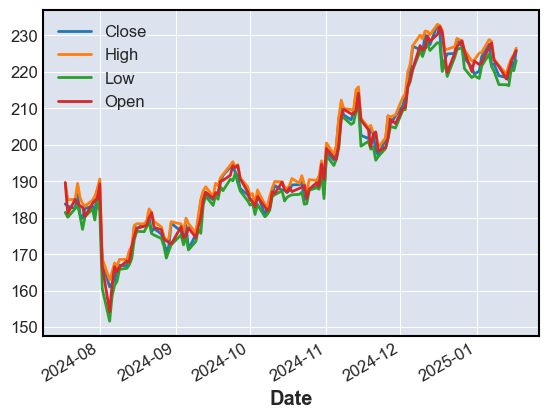

In [65]:
df = data
df = df.drop("Volume", axis=1)

#可視化する
df.plot()

In [66]:
df.dtypes # データ型を確認

Close    float64
High     float64
Low      float64
Open     float64
dtype: object

In [67]:
df.dtypes

Close    float64
High     float64
Low      float64
Open     float64
dtype: object

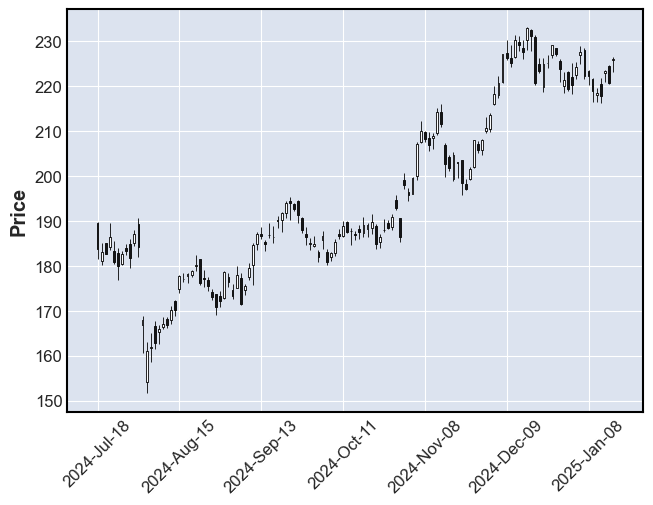

In [68]:
import mplfinance as mpf

#ローソク足グラフの表示
mpf.plot(df, type="candle")

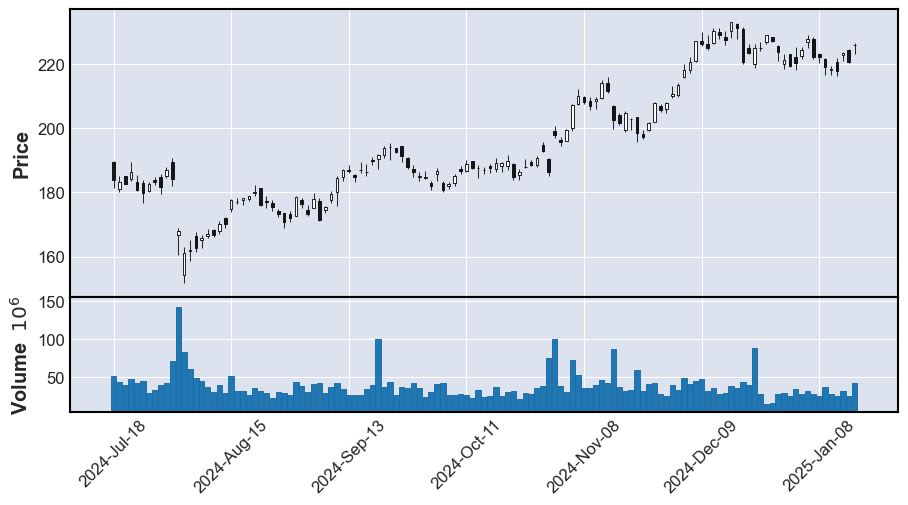

In [69]:
df['Volume'] = data['Volume']

mpf.plot(df, type="candle",volume=True,figratio=(10,5))


株価の分析をするため、取得したデータを使って新しい指標”移動平均“を加えてみましょう！

In [70]:
#移動平均を指標に加える
price = df["Close"]
span = 5
df["sma05"] = price.rolling(window=span).mean()

In [71]:
df

,Close,High,Low,Open,Volume,sma05
Date,,,,,,
2024-07-18,183.750000,189.679993,181.449997,189.589996,51043600,NaN
2024-07-19,183.130005,184.929993,180.110001,181.139999,43081800,NaN
2024-07-22,182.550003,185.059998,182.479996,185.000000,39931900,NaN
2024-07-23,186.410004,189.389999,183.559998,184.100006,47537700,NaN
2024-07-24,180.830002,185.449997,180.410004,183.199997,41532400,183.334003
...,...,...,...,...,...,...
2025-01-13,218.460007,219.399994,216.470001,218.059998,27262700,221.850003
2025-01-14,217.759995,221.820007,216.199997,220.440002,24711700,219.880002
2025-01-15,223.350006,223.570007,220.750000,222.830002,31291300,220.128003


移動平均(sma05)が追加されています！ただ、最初の4日間は５日間分のデータがなくNaNとなっています、、、

そこで、最初の4日間は取得できる日数の平均を取る(min_periods=1)ように設定します

In [72]:
df["sma05"] = price.rolling(window=span, min_periods=1).mean()
df

,Close,High,Low,Open,Volume,sma05
Date,,,,,,
2024-07-18,183.750000,189.679993,181.449997,189.589996,51043600,183.750000
2024-07-19,183.130005,184.929993,180.110001,181.139999,43081800,183.440002
2024-07-22,182.550003,185.059998,182.479996,185.000000,39931900,183.143336
2024-07-23,186.410004,189.389999,183.559998,184.100006,47537700,183.960003
2024-07-24,180.830002,185.449997,180.410004,183.199997,41532400,183.334003
...,...,...,...,...,...,...
2025-01-13,218.460007,219.399994,216.470001,218.059998,27262700,221.850003
2025-01-14,217.759995,221.820007,216.199997,220.440002,24711700,219.880002
2025-01-15,223.350006,223.570007,220.750000,222.830002,31291300,220.128003


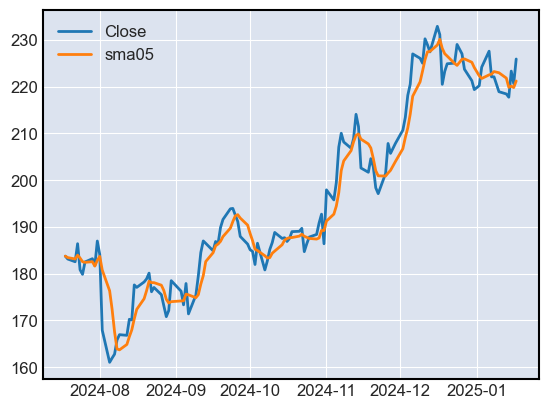

In [73]:
plt.plot(df.index, df["Close"], label="Close")
plt.plot(df.index, df["sma05"], label="sma05")
plt.legend()

# 株価データの分析

今回は6ヶ月間の株価データに対して”ARIMAモデル“を使った時系列データ分析を行います

“ARIMAモデル”は時系列データの差分をとって差分のデータに落とし込むことで定常にし、ARMAモデルを適用するモデルで株価などの非定常性データに用いられます！

In [74]:
#ARIMAモデル データ準備
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
train_data = train_data['Close'].values
test_data = test_data['Close'].values

In [75]:
from statsmodels.tsa.arima.model import ARIMA


ARIMAモデルはARモデルとMAモデルを組み合わせで、下記の3つのパラメータ(p,d,q)を入力します

p:ARモデルのパラメータで、遅延観測値の数
d:観測値の段差
q:MAモデルのパラメータで、移動平均ウィンドウのサイズ

In [76]:
# ARIMAモデル実装
model = ARIMA(train_data, order=(6,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   88
Model:                 ARIMA(6, 1, 0)   Log Likelihood                -239.041
Date:                Mon, 20 Jan 2025   AIC                            492.082
Time:                        22:34:25   BIC                            509.343
Sample:                             0   HQIC                           499.032
                                 - 88                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0169      0.094      0.179      0.858      -0.168       0.202
ar.L2         -0.0545      0.126     -0.432      0.666      -0.302       0.193
ar.L3          0.0150      0.145      0.103      0.9

今回はパラメータ(p,d,q)にp=6、d=1、q=0と選択しました

実際にはパラメータをチューニングして最適な値を見つけてモデル構築しましょう！

では実際にARIMAモデルを用いて予測をしてみます

In [77]:
#ARIMAモデル 予測
history = [x for x in train_data]
model_predictions = []
for time_point in range(len(test_data)):
#ARIMAモデル 実装
    model = ARIMA(history, order=(6,1,0))
    model_fit = model.fit()
#予測データの出力
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
#トレーニングデータの取り込み
    true_test_value = test_data[time_point]
    history.append(true_test_value)

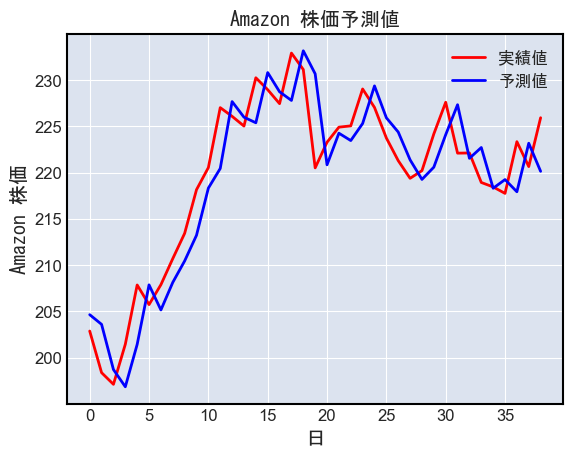

In [78]:
#可視化
plt.plot(test_data, color='Red', label='実績値')
plt.plot(model_predictions, color='Blue', label='予測値')
plt.title('Amazon 株価予測値', fontname="MS Gothic")
plt.xlabel('日', fontname="MS Gothic")
plt.ylabel('Amazon 株価', fontname="MS Gothic")
plt.legend(prop={"family":"MS Gothic"})
plt.show()